In [1]:
import sys
sys.path.append('../')

from model import DecisionTree

import os
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

warnings.filterwarnings(action='ignore')

import seaborn as sns
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

In [2]:
# sage, srgnn 중 선택
embed_model = 'srgnn'
filename = {'sage' : 'user_embedding_sage_sid_6to6_weighted.npy', 'srgnn' : 'srgnn_user_hybrid_6to6_weighted.npy'}
data_path = "../data/"

pivot_df = pd.read_csv(os.path.join(data_path, 'pivot_genre2_data.csv'), index_col=0)
embedding = np.load(os.path.join(data_path, filename[embed_model]))

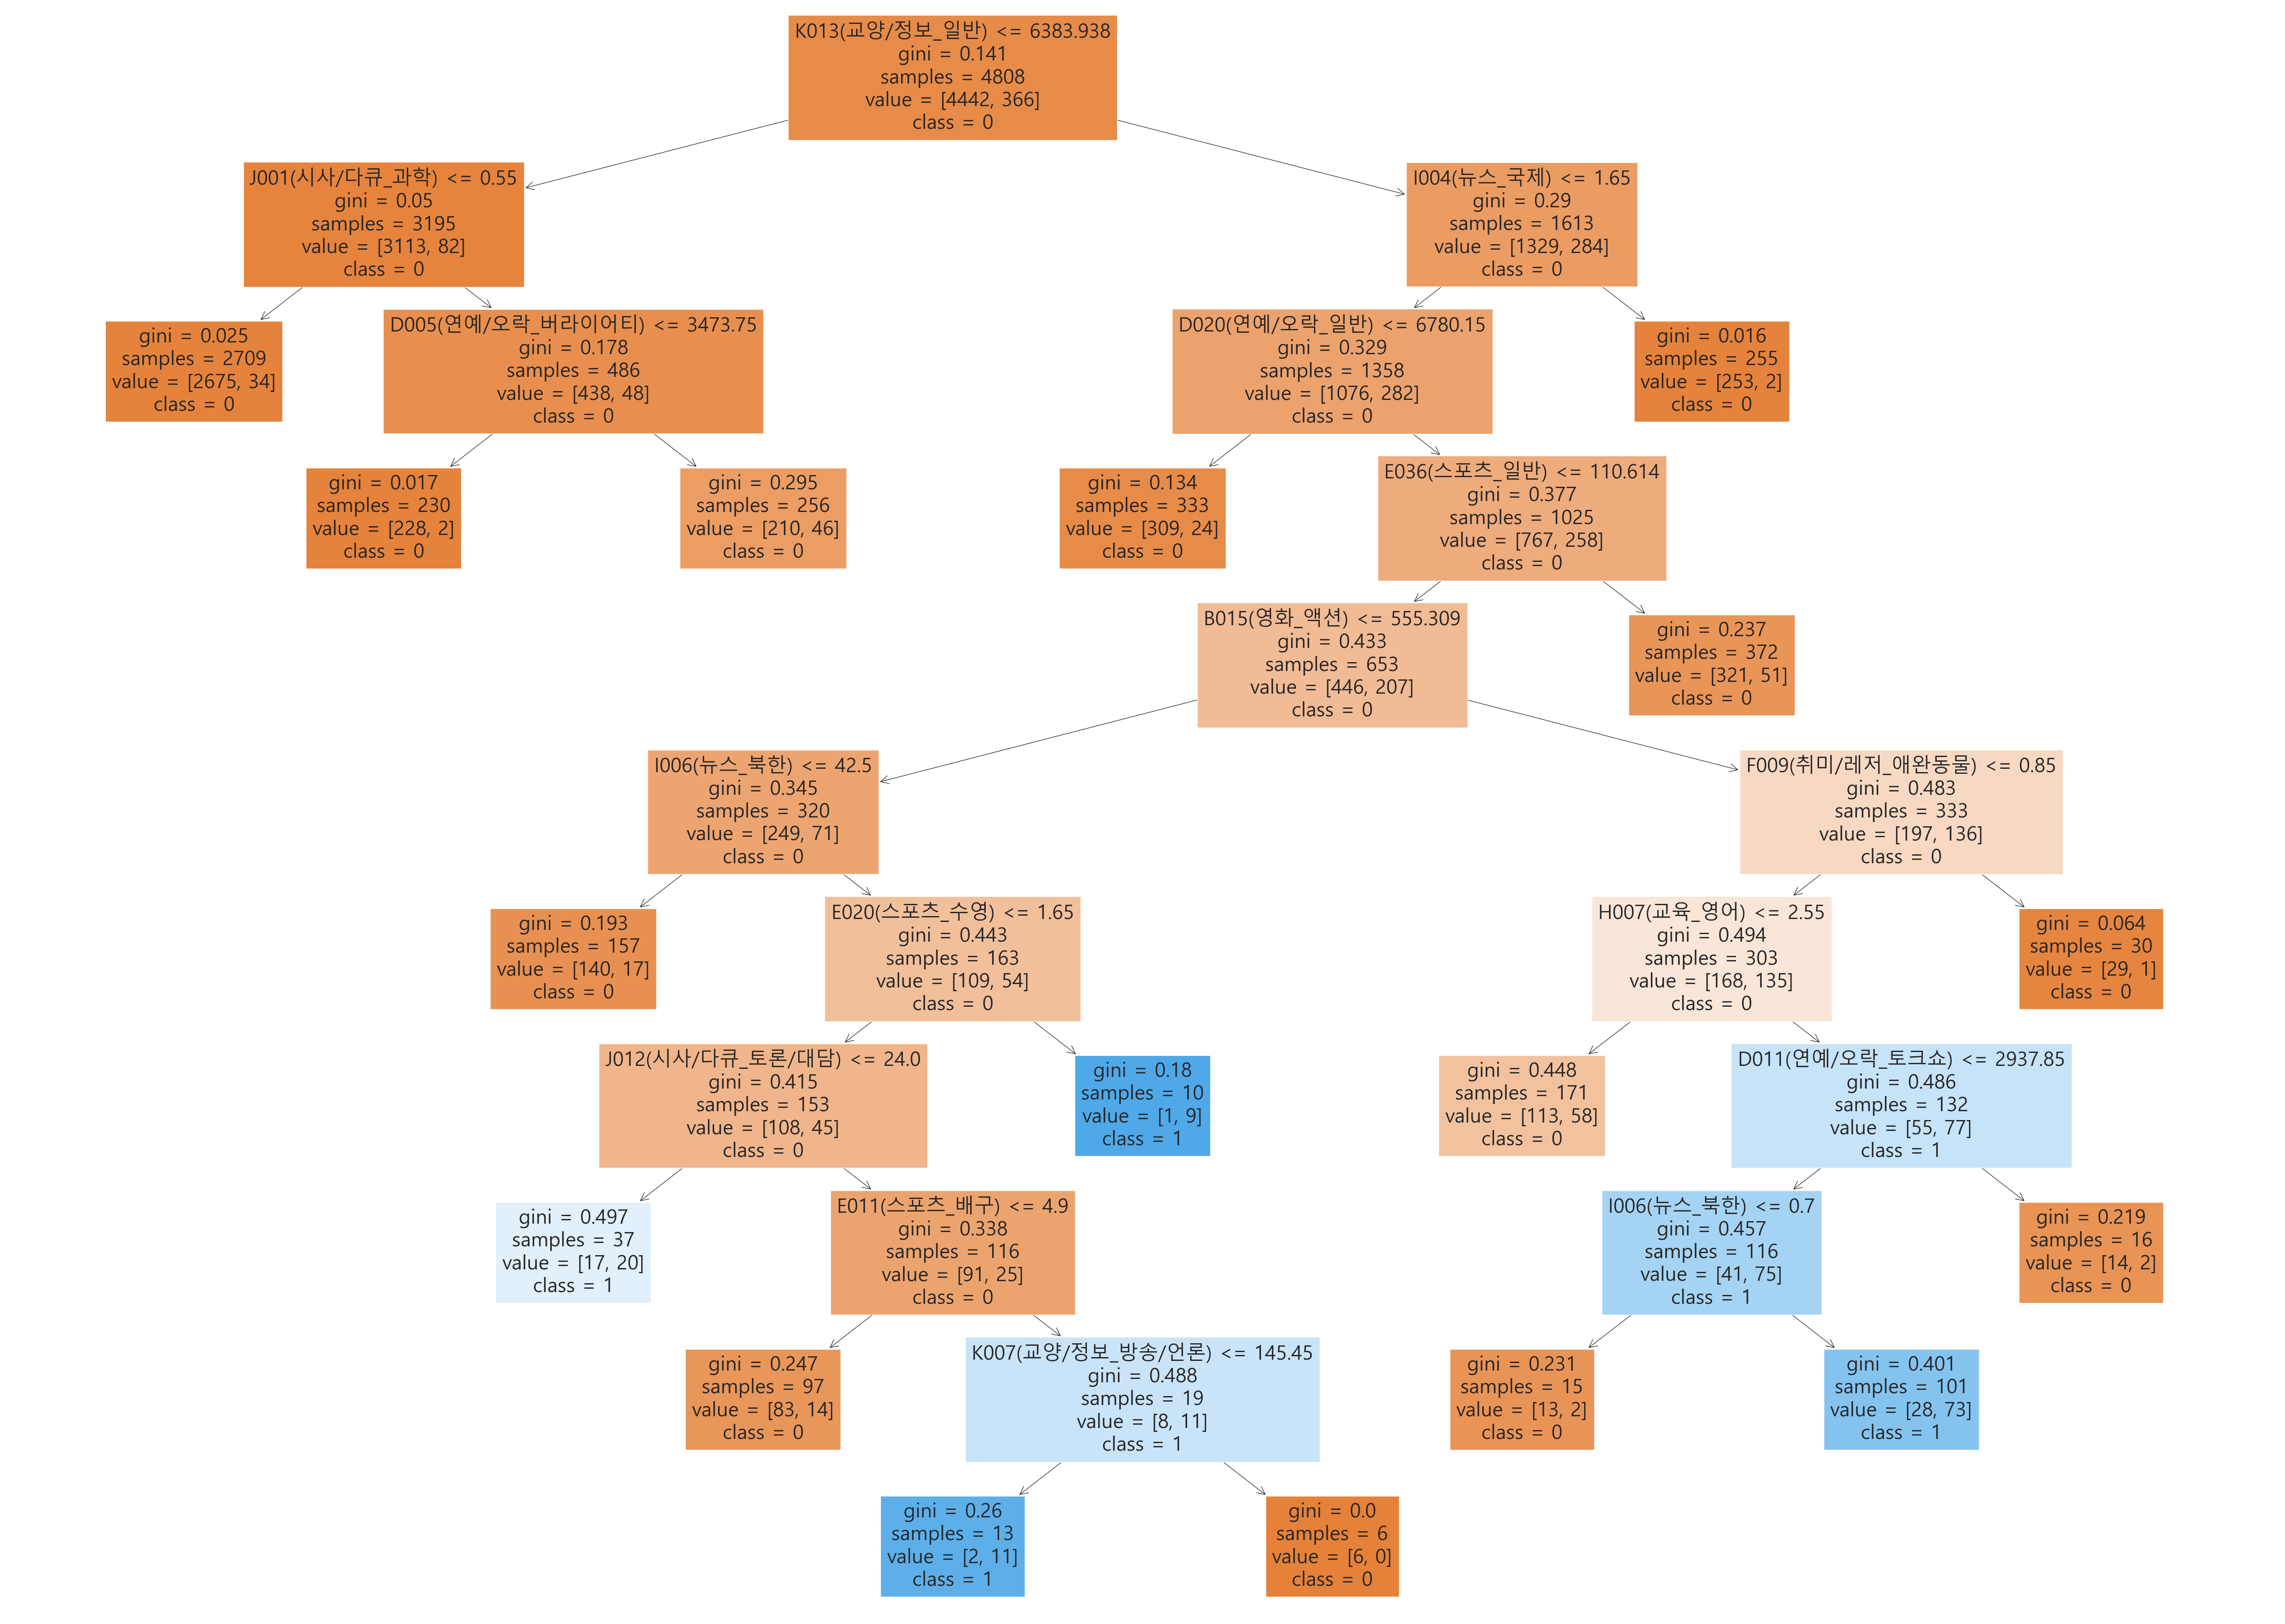

In [3]:
model = DecisionTree(pivot_df, embedding)
model.kmeans_target(tgt_n=0)
dt = model.make_dt(min_impurity_decrease=0.0012)
model.visualize_tree(dt)

In [13]:
class_names = [str(i) for i in np.unique(model.Y)]
class_names

['0', '1']

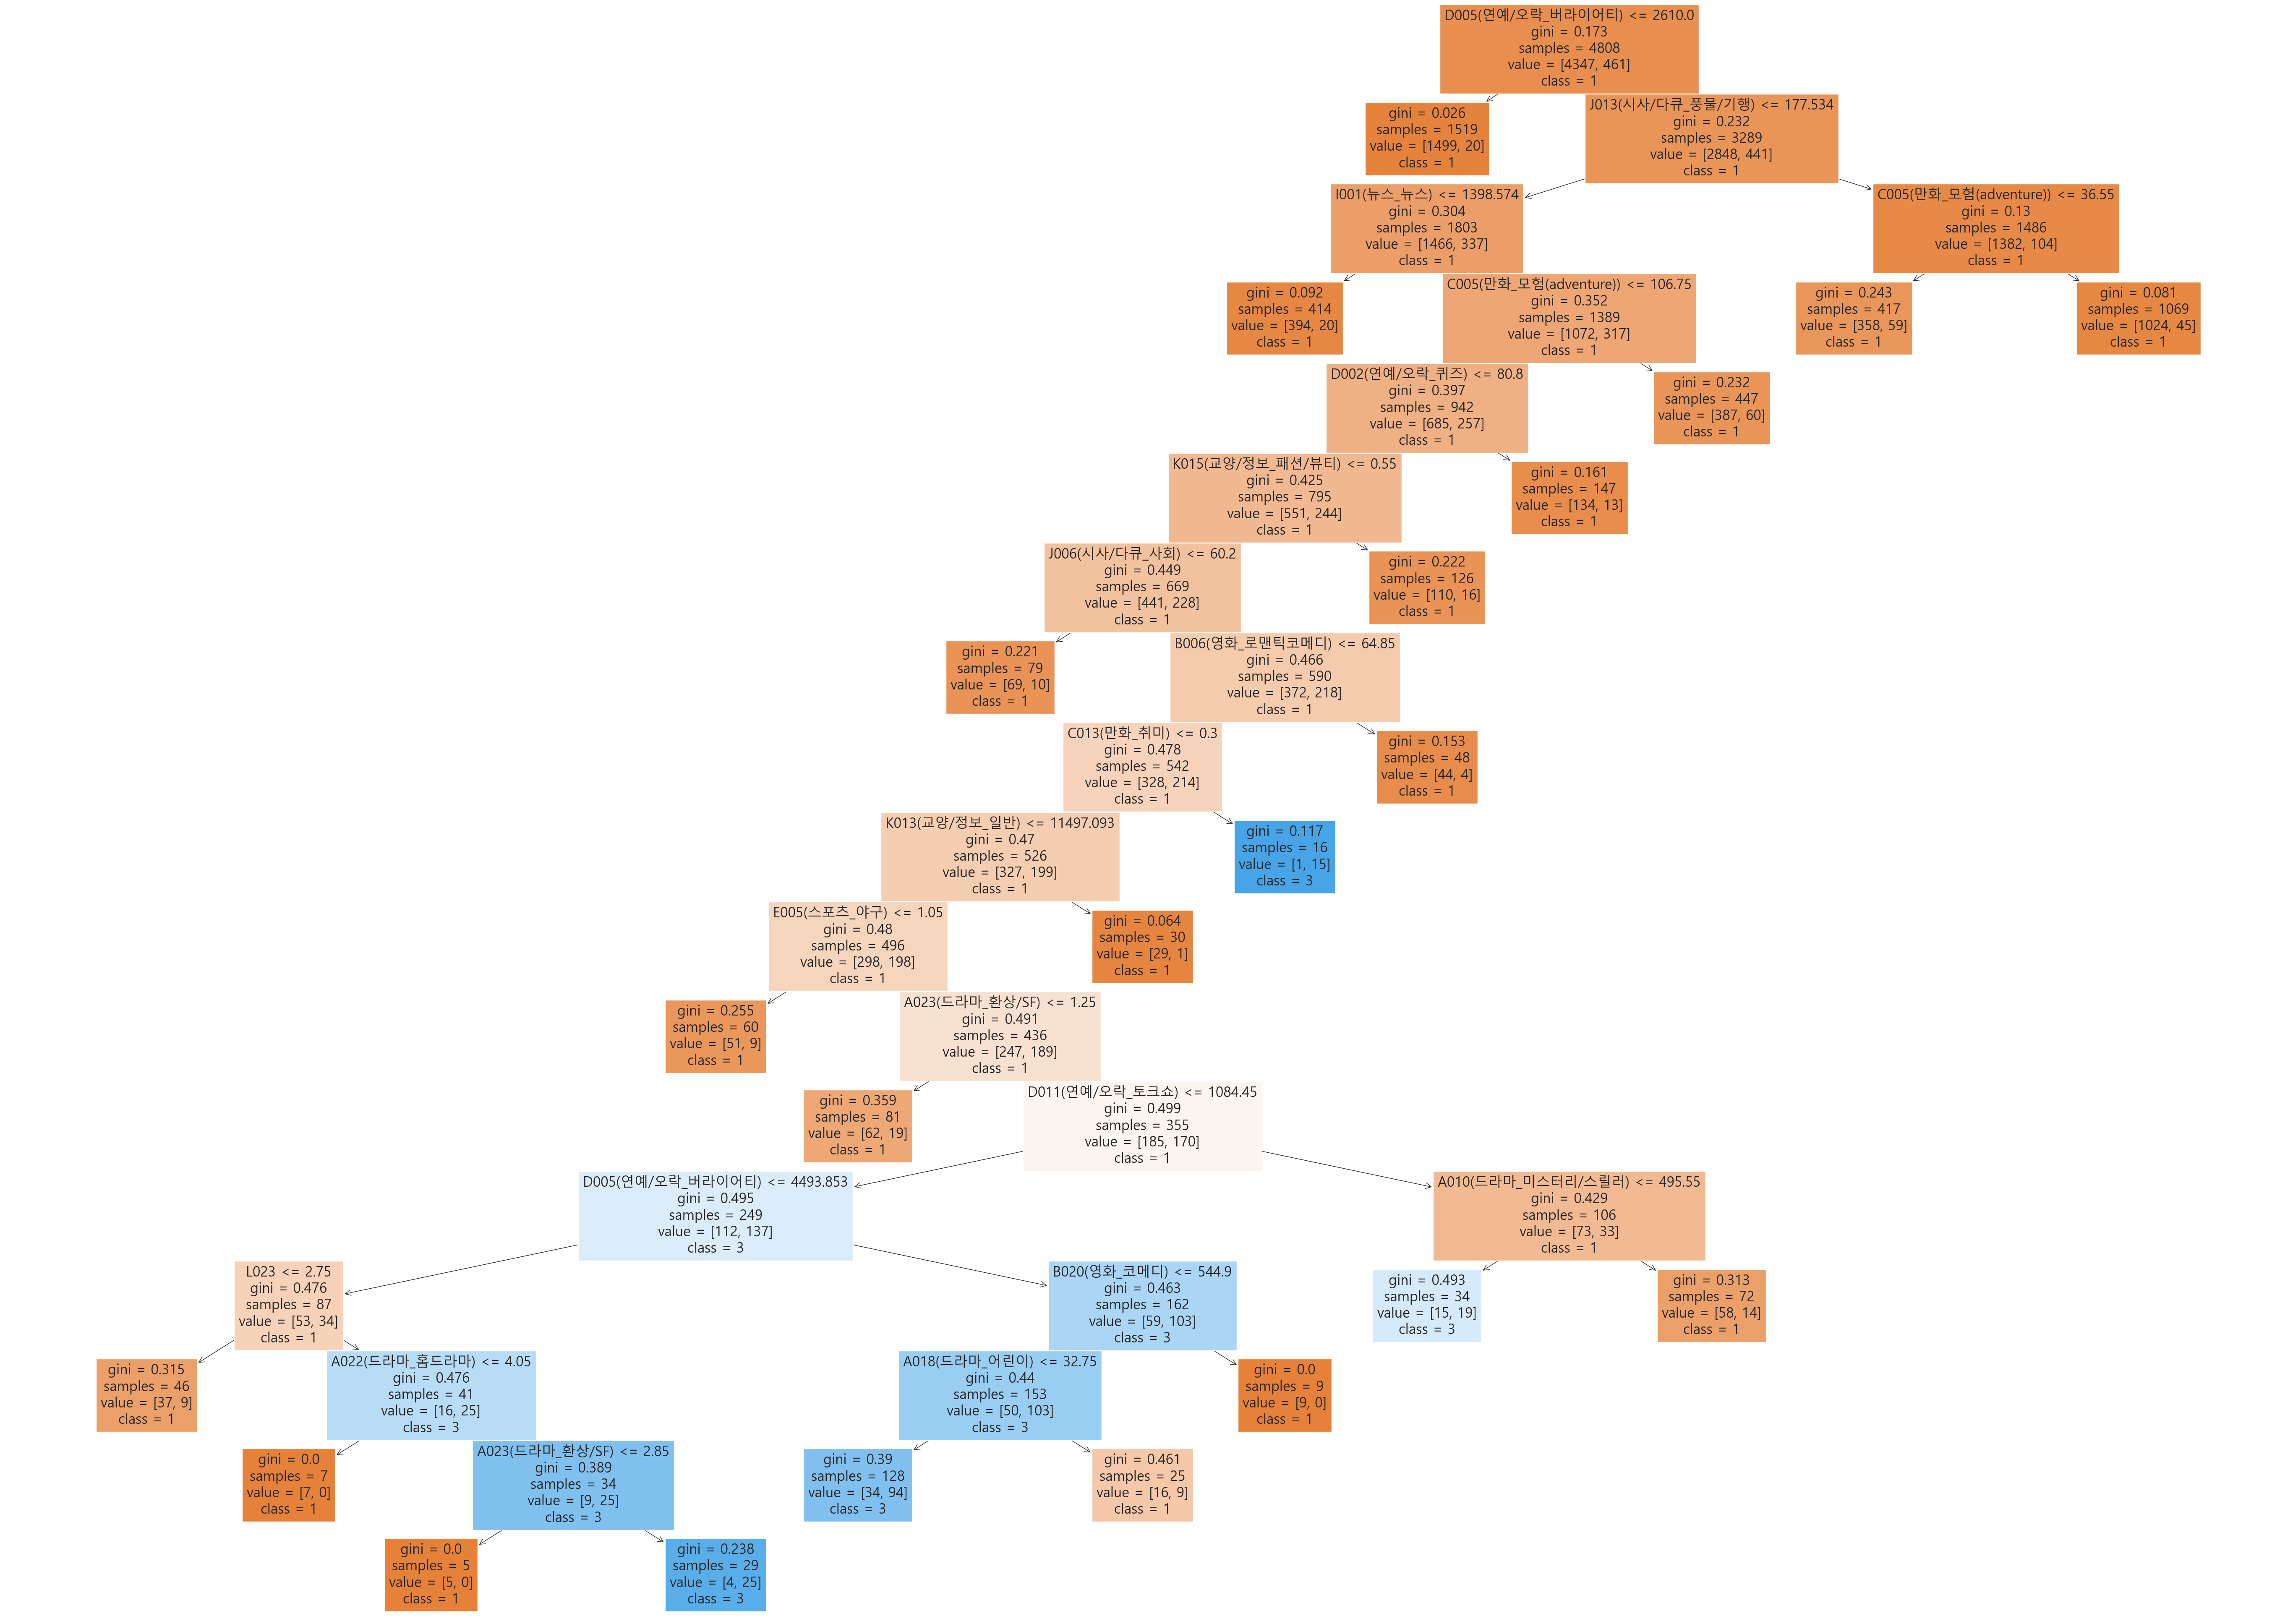

In [13]:
model.kmeans_target(tgt_n=12)
dt = model.make_dt(min_impurity_decrease=0.0012)
model.visualize_tree(dt)

In [12]:
pivot_df['segment'] = model.Y
pivot_df[['segment']][:4000]

,segment
MAC,
0,1
1,3
2,13
3,3
4,5
...,...
4031,14
4032,4
4033,14


In [3]:
model = DecisionTree(pivot_df, embedding)
k = 15
result = []
for i in range(k):
    model.kmeans_target(i)
    dt = model.make_dt(max_depth=10)
    score = model.get_score(dt, scoring='all')
    result.append(score)
result = pd.DataFrame(result, columns=['recall', 'precision', 'f1_score'])
result.mean()

recall       0.808627
precision    0.948475
f1_score     0.859601
dtype: float64

In [3]:
model = DecisionTree(pivot_df, embedding)
dt = model.make_dt(min_samples_leaf=25, min_impurity_decrease=0.0007)
result = [model.get_score(dt, scoring='all')]

result = pd.DataFrame(result, columns=['recall', 'precision', 'f1_score'])
result.mean()

recall       0.497731
precision    0.558474
f1_score     0.513178
dtype: float64

In [6]:
result

,recall,precision,f1_score
0,0.497731,0.558474,0.513178


최대 score의 max_depth = None
max_depth 8에서 target_socre 0.6을 달성하지 못하여 종료합니다.


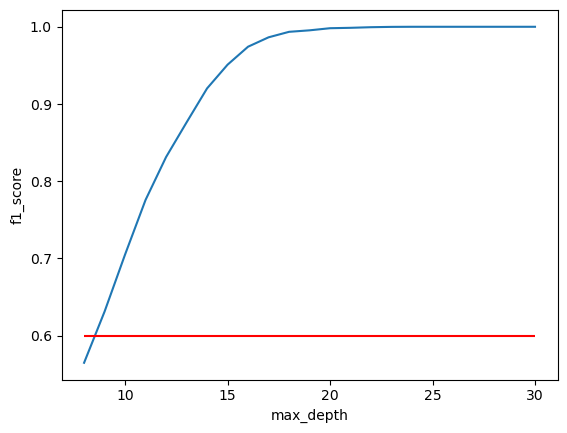

In [5]:
model = DecisionTree(pivot_df, embedding)
search_space = range(30,0,-1)
max_depth, max_score = model.get_proper_param(search_space=search_space)